# This is the code notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import pickle

from ode_system import ODESystem
from waste_water_simulator import WasteWaterSimulator

 # Getting mi_max

## Summer

In [2]:
scenario_name = 'Optimistic Summer'
irradiance_superfitial = 934  # umol/m2s fonte:
temperature = 32   # C - fonte: https://weather.com/weather/monthly/l/5207c9dc43cb29d6a2b220fa6eb54e55620f4562ad1a5679ef3f36812c05a4f2

## winter

In [3]:
scenario_name = 'Optimistic winter'
irradiance_superfitial = 393  # umol/m2s fonte da propoção: http://www.cresesb.cepel.br/index.php?section=sundata
temperature = 16   # C - fonte: https://weather.com/weather/monthly/l/5207c9dc43cb29d6a2b220fa6eb54e55620f4562ad1a5679ef3f36812c05a4f2

## medium expected conditions

In [4]:
# Duration
hidraulic_retention_period_days = 20
time = np.arange(0, hidraulic_retention_period_days, 0.6)

In [5]:
# algae
algae_initial_concentration = 0.003322  # uM/m^3

In [6]:
# substrate
pet_initial_concentration = 680  # mg/m3 - testar também do artigo da najua (https://www.prp.unicamp.br/inscricao-congresso/resumos/2022P19510A36866O4734.pdf) e uma revisão (2021) tbm https://www.revistas.unam.mx/index.php/aidis/article/view/75496
mhet_initial_concentration = 0

In [7]:
# nutrients
amonium_concentration = 30900
nitrate_concentration = 400
phosphate_phosphorum_concentration = 119200

In [8]:
# enviroment
medium_ph = 7.8
dissolved_o2 = 0
bicarbonate_concentration = 20000
co2_concentration = 1600

In [9]:
# putting it all togheter
petase_concentration, mhetase_concentration = [0,0]
dependents = [
    algae_initial_concentration,
    petase_concentration,
    mhetase_concentration,
    pet_initial_concentration,
    mhet_initial_concentration,
    ]
variable_independents = [
    irradiance_superfitial,
    temperature,
    ]
fixed_independents = [
    medium_ph,
    dissolved_o2,
    co2_concentration,
    bicarbonate_concentration,
    nitrate_concentration,
    amonium_concentration,
    phosphate_phosphorum_concentration,
    ]

ode_system = ODESystem()

results = odeint(ode_system.ode_system, y0=dependents, t= time, args=(variable_independents, fixed_independents))
zip(results)
result_algae_concentration, result_petase_concentration, result_mhetase_concentration, result_pet_concentration, result_mhet_concentration = list(zip(*results))

In [10]:
# Save this model
args = [fixed_independents, variable_independents]
inputs = {'y0':dependents, 'args': args}
obj = {'inputs': inputs, 'model': results }
with open(f'scenarios/{scenario_name}.p', mode='wb') as file:
    pickle.dump(obj, file)

# Simulation

In [11]:
time_array = np.arange(0, 21, 1)

## Scenario one - Summer

In [12]:
Cx0 = 0.0000003322
mi_max = 1.64
scenario = WasteWaterSimulator(Cx0, time_array, mi_max)
scenario.simulate(460)


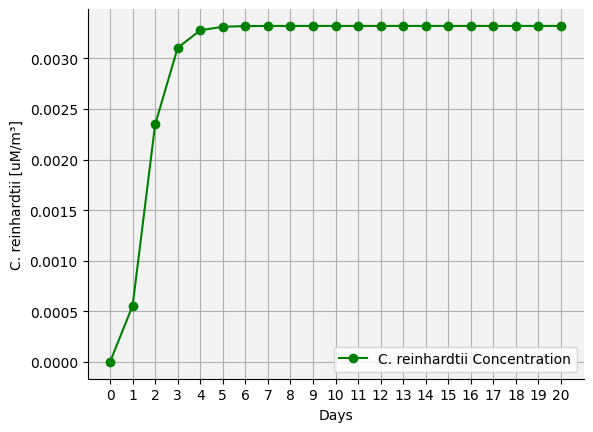

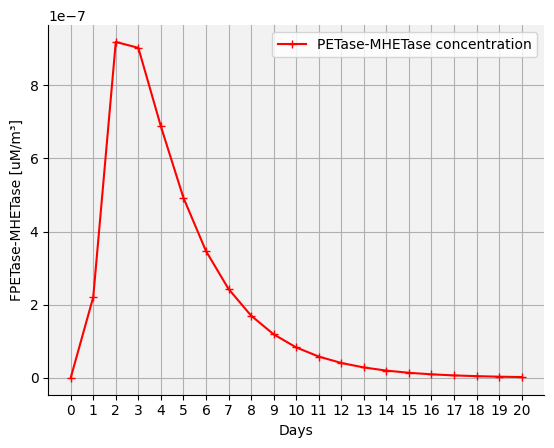

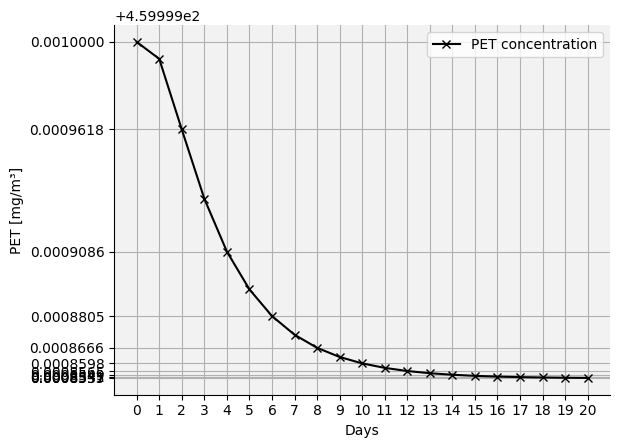

In [13]:
title = 'summer simulation'
scenario.plot_algae(title)
scenario.plot_enzyme(title)
scenario.plot_PET(title)

In [15]:
scenario.get_enzyme_production_list()

[1.2238625393847897e-06,
 0.0003969258742189083,
 0.0003251096275837389,
 8.348887200998918e-05,
 1.7102626677044144e-05,
 3.3528540803070808e-06,
 6.51723037689843e-07,
 1.2647160604910557e-07,
 2.4534862289495248e-08,
 4.759344925850031e-09,
 9.23220612962496e-10,
 1.790864745019179e-10,
 3.473920569639445e-11,
 6.738712733080276e-12,
 1.3071757863277337e-12,
 2.5356601451587265e-13,
 4.9186746226937425e-14,
 9.541247113539247e-15,
 1.8508115186029746e-15,
 3.590204966514818e-16,
 6.964281112376672e-17]

## Scenario two - winter

In [ ]:
Cx0 = 0.0003322
mi_max = -0.039
winter_scenario = WasteWaterSimulator(Cx0, time_array, mi_max)
winter_scenario.simulate(460)

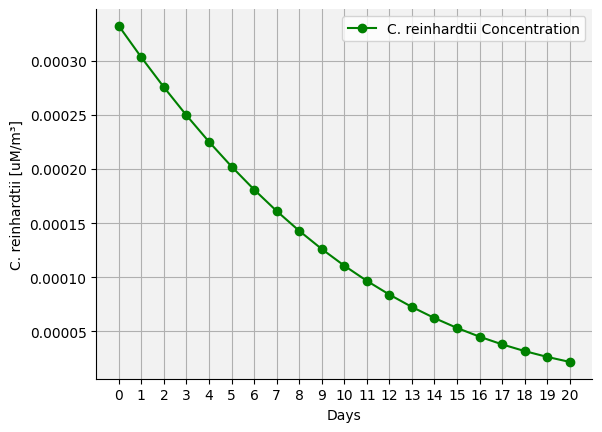

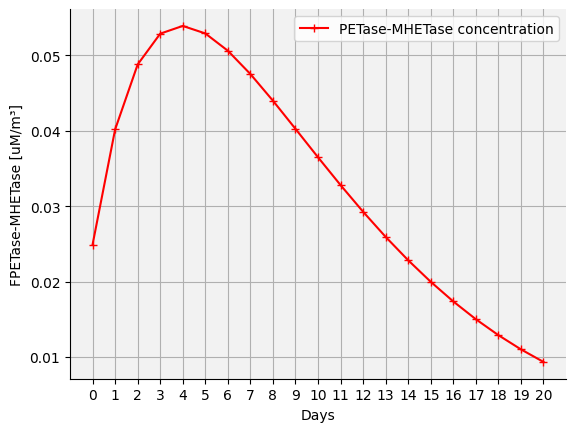

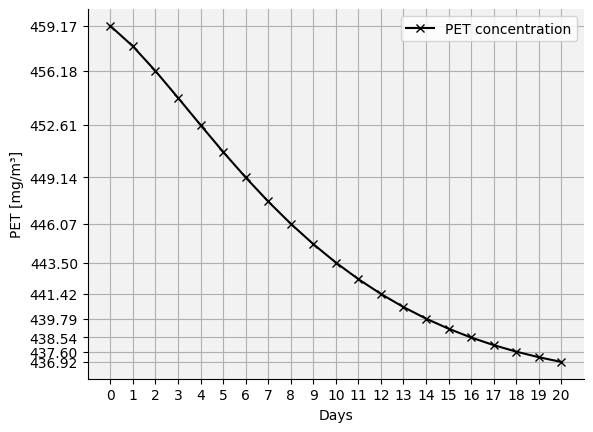

In [ ]:
title = 'winter simulation '
winter_scenario.plot_algae(title)
winter_scenario.plot_enzyme(title)
winter_scenario.plot_PET(title)